In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
from itertools import combinations
%matplotlib inline

In [32]:
df = pd.read_csv('grad.csv')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [7]:
xtab = pd.crosstab(df['admit'], df['rank'])
xtab


rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


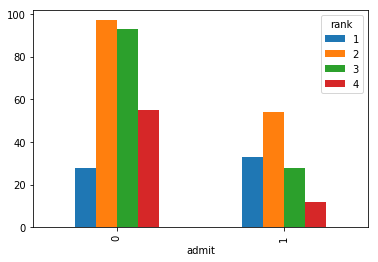

In [8]:
my_plot = xtab.plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C2E6898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C3661D0>], dtype=object)

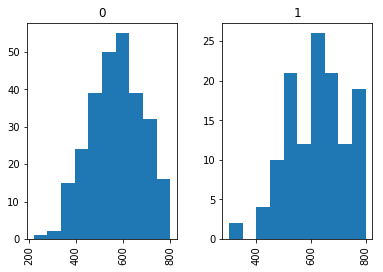

In [9]:
df.hist(column='gre', by=df.admit)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C3483C8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C850BE0>], dtype=object)

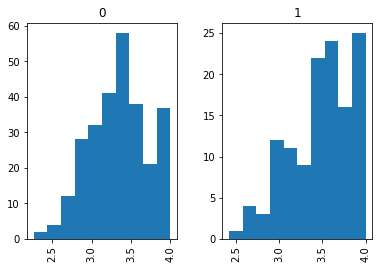

In [10]:
df.hist(column='gpa', by=df.admit)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


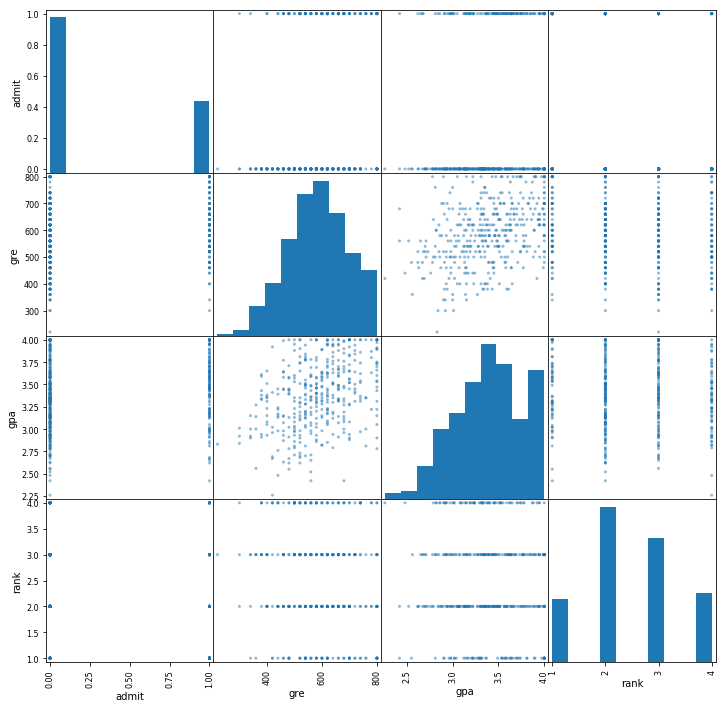

In [12]:
scatter_matrix(df, figsize=(12,12))
None

In [34]:
df['rank1'] = df['rank'].map({1:1, 2:0, 3:0, 4:0})
df['rank2'] = df['rank'].map({1:0, 2:1, 3:0, 4:0})
df['rank3'] = df['rank'].map({1:0, 2:0, 3:1, 4:0})
df['rank4'] = df['rank'].map({1:0, 2:0, 3:0, 4:1})
df.head()

,admit,gre,gpa,rank,rank1,rank2,rank3,rank4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [35]:
rows = []
for i in range(1,6):    
    combos = list(combinations(['gre','gpa','rank1','rank2','rank3','rank4'],i))    
    for combo in combos:        
        model = LogisticRegression(fit_intercept=True)        
        accuracy = cross_val_score(model, df[list(combo)], df.admit, cv=10, scoring='accuracy').mean()        
        rows.append({'Accuracy': accuracy, 'Columns': combo})
df1 = pd.DataFrame(rows)
df1

,Accuracy,Columns
0,0.682570,"(gre,)"
1,0.682570,"(gpa,)"
2,0.684817,"(rank1,)"
3,0.682570,"(rank2,)"
4,0.682570,"(rank3,)"
5,0.682570,"(rank4,)"
6,0.682570,"(gre, gpa)"
7,0.689759,"(gre, rank1)"
8,0.682570,"(gre, rank2)"
9,0.674878,"(gre, rank3)"


In [42]:
#0.714576 (gpa, rank1) 

In [43]:
#higher precision